# Sentiment analysis with Logistic Regression

### Some plotting functions

In [17]:
# Importing packages
from matplotlib import pyplot as plt
import numpy as np
import random

In [18]:
# Some functions to plot our points and draw the lines
def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in spam],
                [s[0][1] for s in spam],
                s = 25,
                color = 'cyan',
                edgecolor = 'k',
                marker = '^')
    plt.scatter([s[0][0] for s in ham],
                [s[0][1] for s in ham],
                s = 25,
                color = 'red',
                edgecolor = 'k',
                marker = 's')
    plt.xlabel('aack')
    plt.ylabel('beep')
    plt.legend(['happy','sad'])
def draw_line(a,b,c, color='black', linewidth=2.0, linestyle='solid', starting=0, ending=3):
    # Plotting the line ax + by + c = 0
    x = np.linspace(starting, ending, 1000)
    plt.plot(x, -c/b - a*x/b, linestyle=linestyle, color=color, linewidth=linewidth)

In [60]:
import pandas as pd
X = pd.DataFrame([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[3,2],[2,3]])
y = pd.Series([0,0,0,0,1,1,1,1])

,0,1
0,1,0
1,0,2
2,1,1
3,1,2
4,1,3
5,2,2
6,3,2
7,2,3


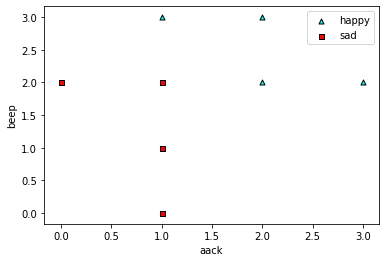

In [20]:
# Plotting the points
plot_points(X, y)

# Uncomment the following line to see a good line fit for this data.
#draw_line(1,1,-3.5)

### Logistic regression

In [39]:
def sigmoid(x):
    return np.exp(x)/(1+np.exp(x))

def lr_prediction(weights, bias, features):
    return sigmoid(score(weights, bias, features))

def log_loss(weights, bias, features, label):
    pred = prediction(weights, bias, features)
    return label*np.log(prediction) + (1-label)*np.log(1-prediction)

def total_log_loss(weights, bias, X, y):
    total_error = 0
    for i in range(len(X)):
        total_error += log_loss(weights, bias, X.loc[i], y[i])
    return total_error

In [40]:
# Alternate way of writing log-loss

def soft_relu(x):
    return np.log(1+np.exp(x))

def alternate_log_loss(weights, bias, features, label):
    pred = prediction(weights, bias, features)
    return soft_relu((pred-label)*score(weights, bias, features))

def total_alternate_log_loss(weights, bias, X, y):
    total_error = 0
    for i in range(len(X)):
        total_error += lr_error(weights, bias, X.loc[i], y[i])
    return total_error

In [41]:
def lr_trick(weights, bias, features, label, learning_rate = 0.01):
    pred = lr_prediction(weights, bias, features)
    for i in range(len(weights)):
        weights[i] += (label-pred)*features[i]*learning_rate
        bias += (label-pred)*learning_rate
    return weights, bias

In [42]:
def lr_algorithm(features, labels, learning_rate = 0.01, epochs = 200):
    weights = [1.0 for i in range(len(features.loc[0]))]
    bias = 0.0
    errors = []
    for i in range(epochs):
        draw_line(weights[0], weights[1], bias, color='grey', linewidth=1.0, linestyle='dotted')
        errors.append(total_error(weights, bias, features, labels))
        j = random.randint(0, len(features)-1)
        weights, bias = perceptron_trick(weights, bias, features.loc[j], labels[j])
    draw_line(weights[0], weights[1], bias)
    plot_points(features, labels)
    plt.show()
    plt.scatter(range(epochs), errors)
    plt.xlabel('epochs')
    plt.ylabel('error')
    return weights, bias

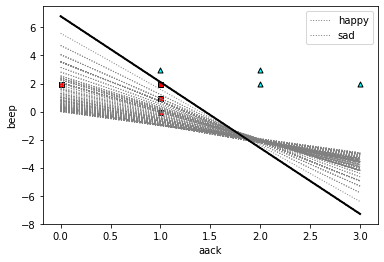

([0.46999999999999953, 0.09999999999999937], -0.6800000000000004)

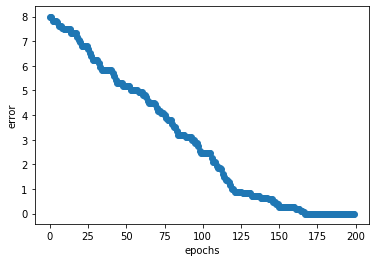

In [43]:
lr_algorithm(features, labels)

# Logistic regression using Turi Create

In [64]:
import turicreate as tc

data = tc.SFrame({'X1': X[0], 'X2': X[1], 'y': y})
data

X1,X2,y
1,0,0
0,2,0
1,1,0
1,2,0
1,3,1
2,2,1
3,2,1
2,3,1


In [81]:
classifier = tc.logistic_classifier.create(data,
                                           features = ['X1', 'X2'],
                                           target = 'y',
                                           validation_set=None)

Logistic regression:

--------------------------------------------------------

Number of examples          : 8

Number of classes           : 2

Number of feature columns   : 2

Number of unpacked features : 2

Number of coefficients      : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy |

+-----------+----------+--------------+-------------------+

| 1         | 2        | 0.007745     | 1.000000          |

| 2         | 3        | 0.010042     | 1.000000          |

| 3         | 4        | 0.010653     | 1.000000          |

| 4         | 5        | 0.011161     | 1.000000          |

+-----------+----------+--------------+-------------------+

SUCCESS: Optimal solution found.

In [83]:
print("Model coefficients", model.coefficients)

Model coefficients +-------------+-------+-------+--------------------+--------------------+
|     name    | index | class |       value        |       stderr       |
+-------------+-------+-------+--------------------+--------------------+
| (intercept) |  None |   1   | -8.959708265685023 | 6.844844514902394  |
|      X1     |  None |   1   | 2.972553703911967  | 2.6977310191336055 |
|      X2     |  None |   1   | 2.498635186535742  | 2.455296103059154  |
+-------------+-------+-------+--------------------+--------------------+
[3 rows x 5 columns]



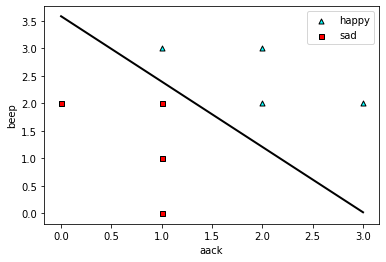

In [84]:
intercept, w1, w2 = classifier.coefficients['value']

plot_points(features, labels)
draw_line(w1, w2, intercept)